# Import data

In [1]:
import pandas as pd
df = pd.read_csv('tests/Students Social Media Addiction.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.patches import Patch

# from .. import utils

from kuka.utils.plot import _adjust_obj_to_ref
from kuka.utils.plot import _plot_bboxes

def _add_aling_and_adjust_labels_manually(
		axs_plots:list,
		fig:Figure,
		xlabels:list, 
		ylabels:list,
		kargs_labels:dict,
		):
	
	fig.canvas.draw()
	renderer = fig.canvas.get_renderer()
	
	# Get the minimum y0-coord of xticklabels:
	min_y0_xticklabels = np.inf
	for ax in axs_plots[-1]:
		for ticklabel in ax.get_xticklabels():
			if ticklabel.get_text():
				ticklabel_bbox = ticklabel.get_window_extent(renderer=renderer)
				min_y0_xticklabels = ticklabel_bbox.y0 if (ticklabel_bbox.y0 < min_y0_xticklabels) else min_y0_xticklabels
	# Get the minimum x0-coord of yticklabels:
	first_col_ax = [lista[0] for lista in axs_plots]
	min_x0_yticklabels = np.inf
	for ax in first_col_ax:
		for ticklabel in ax.get_yticklabels():
			if ticklabel.get_text():
				ticklabel_bbox = ticklabel.get_window_extent(renderer=renderer)
				min_x0_yticklabels = ticklabel_bbox.x0 if (ticklabel_bbox.x0 < min_x0_yticklabels) else min_x0_yticklabels
	
	min_y0_xticklabels = axs_plots[-1][0].get_window_extent(renderer=renderer).y0 if min_y0_xticklabels==np.inf else min_y0_xticklabels
	min_x0_yticklabels = first_col_ax[0].get_window_extent(renderer=renderer).x0 if min_x0_yticklabels==np.inf else min_x0_yticklabels

	xlabels_obj = []
	ylabels_obj = []

	# Put labels in x axis
	for ax, text in zip(axs_plots[-1], xlabels):
		# Put the xlabels
		bbox_axis = ax.get_window_extent(renderer)
		xy0 = fig.transFigure.inverted().transform((bbox_axis.x0, bbox_axis.y0))
		obj = fig.text(xy0[0], xy0[1], text, 
				horizontalalignment='center',
				verticalalignment='center',
				**kargs_labels
				)
		
		# center the labels on x-axis and place them at the same height
		bbox = obj.get_window_extent(renderer)
		x_bbox = (bbox.x0 + bbox.width/2) + bbox_axis.width/2
		y_bbox = min_y0_xticklabels - 0.15*bbox_axis.height
		xy = fig.transFigure.inverted().transform((x_bbox, y_bbox))
		obj.set_position( (xy[0], xy[1]) )
		xlabels_obj.append(obj)

	# Put labels in y axis
	for ax, text in zip(first_col_ax, ylabels):
		# Put the ylabels
		bbox_axis = ax.get_window_extent(renderer)
		xy0 = fig.transFigure.inverted().transform((bbox_axis.x0, bbox_axis.y0))
		obj = fig.text(xy0[0], xy0[1], text, 
				horizontalalignment='center', 
				verticalalignment='center', 
				rotation = 'vertical',
				**kargs_labels
				)
		
		# center the labels on x-axis and place them at the same height
		bbox = obj.get_window_extent(renderer)
		x_bbox = min_x0_yticklabels - 0.15*bbox_axis.width
		y_bbox = (bbox.y0 + bbox.height/2) + bbox_axis.height/2
		xy = fig.transFigure.inverted().transform((x_bbox, y_bbox))
		obj.set_position( (xy[0], xy[1]) )
		# obj.set_position( (xy[0], obj.get_position()[1]) )
		ylabels_obj.append(obj)

	
	# Adjust x labels
	_adjust_obj_to_ref(
		fig,
		xlabels_obj,
		list(axs_plots[-1]),
		'w',
		['wrap_until_fit'],
		)
	xticklabels_of_last_row = np.array([obj.get_xticklabels() for obj in axs_plots[-1]]).ravel()
	_adjust_obj_to_ref(
		fig,
		xlabels_obj,
		list(xticklabels_of_last_row) + list(axs_plots[-1]),
		'w',
		['move_until_no_overlaps'],
		move_rate=(0, -0.015),
		)
	# Adjust y labels
	_adjust_obj_to_ref(
		fig,
		ylabels_obj,
		first_col_ax,
		'h',
		['wrap_until_fit'],
		)
	yticklabels_of_first_col = np.array([obj.get_yticklabels() for obj in first_col_ax]).ravel()
	_adjust_obj_to_ref(
		fig,
		ylabels_obj,
		list(yticklabels_of_first_col) + list(first_col_ax),
		'w',
		['move_until_no_overlaps'],
		move_rate=(-0.015, 0),
		)






_input_val_dict = {
	'df': ( pd.DataFrame, None ), 
	'columns' : ( (list, tuple), None ),
	'by': ( (str, None.__class__), None ),
	
	'colors_reference': ( (list, tuple), None ),
	'dict_colors_of_variable_by': ((None.__class__ , dict), None),
	'zorder': ((list, tuple, None.__class__), None),
	'markers': ((list, None.__class__), None),

	'fontsize': ( (float, int, None.__class__), 'range', [0, np.inf] ),
	'kargs_labels': ( dict, None ),

	'figsize': ( (list, tuple), 'length', 2 ),
	'wspace': ( (int, float), None ),
	'hspace': ( (int, float), None ),

	'tick_majorlabel': ( bool, None ),
	'tick_labelsize': ( (int, float), None ),
	'tick_labelformat': ( str, None ),
	'margins': ( (int, float), None ),

	'show_kdeplots': ( (int, None.__class__), 'range', [0, np.inf] ),
	'kdeplots_level': ( (float, int), 'range', [0, np.inf] ),
	'show_kdeplots_of_by': ( bool, None ),
}

# @utils._input_function_validation(_input_val_dict)
def plot_plairplot(
		df, 
		columns = ['all'],
		by = None,
		
		colors_reference = ['black', '#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff'],
		dict_colors_of_variable_by = None,
		zorder = None,
		markers = None,

		fontsize = None,
		kargs_labels:dict = {'fontweight':'bold'},

		figsize = None,
		wspace = 0.12,
		hspace = 0.12,
		s = 10,

		tick_majorlabel = True,
		tick_labelsize = None,
		tick_labelformat = '{x:.4g}',
		margins = 0.08,

		show_kdeplots = None,
		kdeplots_level = 3,
		show_kdeplots_of_by = False,
		kargs_kdeplots = {},

		**kwargs_scatter

		) -> tuple[Figure, Axes]:

	##########################################################
	########### 0 - Define initial configurations: ###########
	##########################################################

	df = df.copy()

	if (columns == ['all']):
		columns = list(df.columns)
	else:
		check = all([ col in list(df.columns) for col in columns])
		assert check, 'Some "columns" component are not in "df.columns"'
		check = len(columns)>=3
		assert check, 'The "columns" argument must have length > 3'

	if (figsize is None):
		figsize = (6, 6)

	if (tick_labelsize is None):
		tick_labelsize = matplotlib.rcParams['font.size']

	if (fontsize is None):
		fontsize = matplotlib.rcParams['font.size']
	kargs_labels['fontsize'] = fontsize

	if by:
		column_by = df[by].copy()
		unique_by = column_by.unique()
		# make sure that zorder_list is in "unique_by"
		if zorder:
			check = all([(cat in unique_by) for cat in zorder])
			assert check, 'Some "zorder" categories are not in "by" unique values'
	
	# make sure that "markers" has the same length of "unique_by"
	if by:
		if markers:
			markers = markers + [matplotlib.rcParams["scatter.marker"]]*(len(unique_by)-len(markers)) if len(markers)<len(unique_by) else markers
		else:
			markers = [matplotlib.rcParams["scatter.marker"]]*len(unique_by)
		markers.reverse()
	else:
		markers = [matplotlib.rcParams["scatter.marker"]]


	# Only work with numeric columns
	print(f'\n    String type columns:\n')
	numeric_columns = []
	for col in columns:
		if not(df[col].dtype == object):
			numeric_columns.append(col)
		else:
			print(col,'     ',df[col].dtype)
	columns = numeric_columns
	print('columns = ', list(columns))
	print('\n')

	# Define the colors for each unique values "unique_by"
	# If len(unique_by) > len(colors_reference), the colors os "colors_reference" will repeat
	if by:

		if dict_colors_of_variable_by:
			# validate dict_colors_of_variable_by
			check = len(dict_colors_of_variable_by.keys()) == len(unique_by)
			assert check, 'len(dict_colors_of_variable_by.keys()) != len(unique_by)'
			for cat in unique_by:
				check = cat in list(dict_colors_of_variable_by.keys())
				assert check, 'dict_colors_of_variable_by does not have all the categories of "by"'
			colors = dict_colors_of_variable_by
		else:
			colors_sequence = []
			n = len(unique_by)//len(colors_reference)
			r = len(unique_by)%len(colors_reference)
			colors_sequence = colors_reference*n + colors_reference[0:r]
			colors = dict(zip(unique_by,colors_sequence))

	else:
		colors = colors_reference[0]


	fig, ax = plt.subplots(ncols=len(columns)-1,
							nrows=len(columns)-1,
							figsize=figsize)
	
	################################################################
	########### 1 - set a piece of code that will repeat ###########
	################################################################

	def graph_definitions():
		xlim = (df[col].min(), df[col].max())
		ylim = (df[row].min(), df[row].max())

		if not(np.isnan(xlim[0]) or np.isnan(xlim[1])):
			ampl_x = (xlim[1] - xlim[0])*margins
			ax[i,j].set_xlim([ xlim[0]-ampl_x, xlim[1]+ampl_x ])
		if not(np.isnan(ylim[0]) or np.isnan(ylim[1])):
			ampl_y = (ylim[1] - ylim[0])*margins
			ax[i,j].set_ylim([ ylim[0]-ampl_y, ylim[1]+ampl_y ])

		ax[i,j].xaxis.set_major_locator(matplotlib.ticker.FixedLocator(xlim))
		ax[i,j].yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ylim))

		if tick_majorlabel == True:
			ax[i,j].tick_params(axis = 'both', which='major', bottom=True, left=True, length=6)
			ax[i,j].tick_params(axis = 'both', labelsize=tick_labelsize)
			ax[i,j].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(tick_labelformat))
		else:
			ax[i,j].tick_params(axis = 'both', which='major', labelbottom=False, labelleft=False)

		# X and Y labels
		# if the graph is in the last row
		if (i==(len(columns)-2)):
			xlabels.append(col)
			ax[i,j].tick_params(axis='x', which='both', rotation=90)
		else:
			ax[i,j].tick_params(which='both', bottom=False, labelbottom=False)

		# if the graph is in the first column
		if (j==0):
			ylabels.append(row)
		else:
			ax[i,j].tick_params(which='both', left=False, labelleft=False)
	
	###########################################
	########### 2 - Plot the graphs ###########
	###########################################
	if by:
		if zorder:
			order_of_plot = list(zorder)
			order_of_plot += list( set(unique_by) - set(order_of_plot) ) 
			order_of_plot.reverse()
		else:
			order_of_plot = unique_by

	i, j = (-1, -1)
	xlabels = []
	ylabels = []

	for row in columns: #i
		for col in columns: #j
			if (row==col):
				j = 0
				break
			# Plot:
			if by:
				for count, group in enumerate(order_of_plot):
					df_filtered = df.loc[ column_by==group, [row, col] ]
					ax[i,j].scatter(
						x = df_filtered[col],
						y = df_filtered[row],
						color = colors[group],
						marker = markers[count],
						s = s,
						**kwargs_scatter
						)
					
			else:
				df_filtered = df.dropna(subset=[row, col])
				ax[i,j].scatter(
					x = df_filtered[col],
					y = df_filtered[row],
					color = colors,
					marker = markers[0],
					s = s,
					**kwargs_scatter
					)
				
			graph_definitions()
			j+=1
		i+=1

	########################################
	########## 3 - Plot kde plots ##########
	########################################
	if show_kdeplots:
		i, j = (-1, -1)

		for row in columns: #i
			for col in columns: #j
				if (row==col):
					j = 0
					break
				# Plot contour plots:
				if (by is not None) and (show_kdeplots_of_by):
					for count, group in enumerate(order_of_plot):
						df_filtered = df.loc[ column_by==group, [row, col] ]
						sns.kdeplot(df_filtered, x=col, y=row,
							levels = kdeplots_level,
							color = colors[group],
							ax=ax[i,j],
							**kargs_kdeplots
							)
						ax[i,j].collections[-1].set_zorder(show_kdeplots)
					ax[i,j].set_xlabel(None)
					ax[i,j].set_ylabel(None)
					
				else:
					df_filtered = df.dropna(subset=[row, col])
					sns.kdeplot(df_filtered, x=col, y=row,
							levels = kdeplots_level,
							ax=ax[i,j],
							**kargs_kdeplots
							)
					ax[i,j].collections[-1].set_zorder(show_kdeplots)
					ax[i,j].set_xlabel(None)
					ax[i,j].set_ylabel(None)
					
				j+=1
			i+=1

	###########################################
	########## 4 - Final adjustments ##########
	###########################################

	#Remover eixos não usados
	aux = 0
	for row in range(len(columns)-1): #i
		for col in range(len(columns)-1): #j
			if col>row:
				ax[row,col].remove()

	plt.subplots_adjust(wspace=wspace, hspace=hspace)

	_add_aling_and_adjust_labels_manually(ax, fig, xlabels, ylabels, kargs_labels=kargs_labels)

	# Put a legend manually
	if by:
		legend_paches = []
		for k, v in colors.items():
			legend_paches.append( Patch( color=v, label=k) )
		xmax = ax[-1][len(columns)-2].get_position(fig.transFigure).x1
		ymax = ax[0][0].get_position(fig.transFigure).y1
		
		fig.legend(handles=legend_paches, title=by+' colors:', loc='upper right', bbox_to_anchor=(xmax, ymax), edgecolor='black')
	
	return fig, ax

In [3]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

# plot_plairplot basic attributes


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




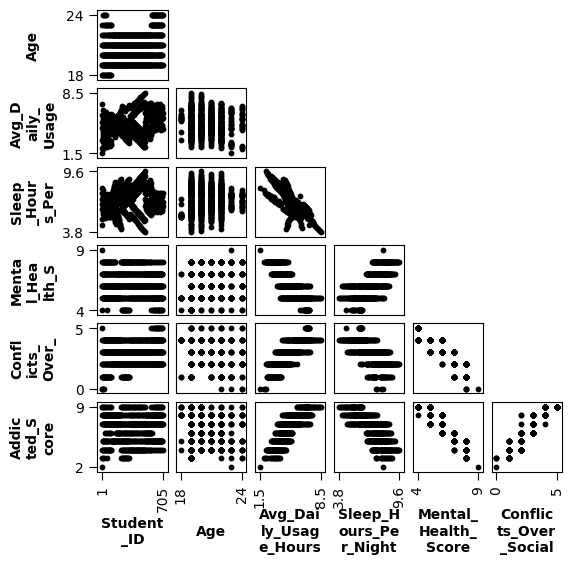

In [4]:
fig, ax = plot_plairplot(df)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




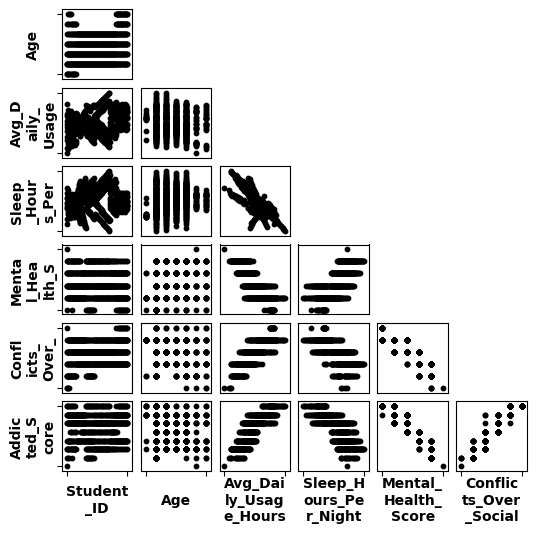

In [5]:
fig, ax = plot_plairplot(df, tick_majorlabel=False)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




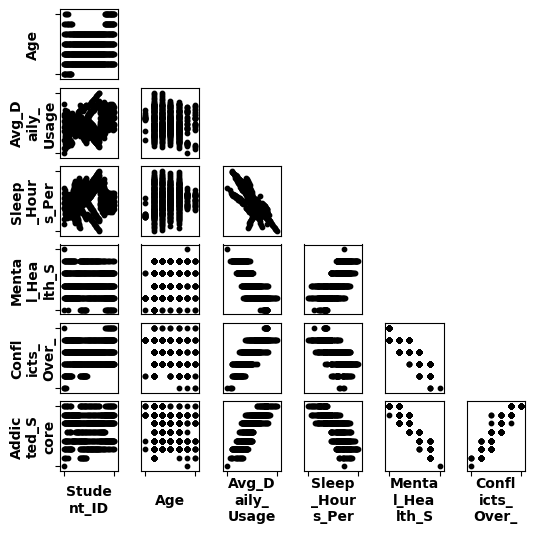

In [6]:
fig, ax = plot_plairplot(df, tick_majorlabel=False, wspace=0.4)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




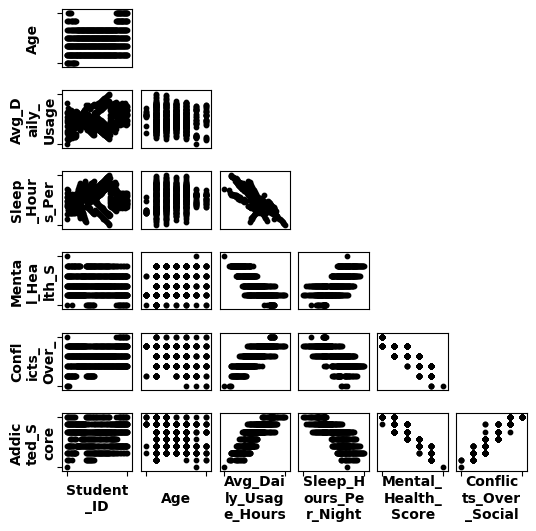

In [7]:
fig, ax = plot_plairplot(df, tick_majorlabel=False, hspace=0.4)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




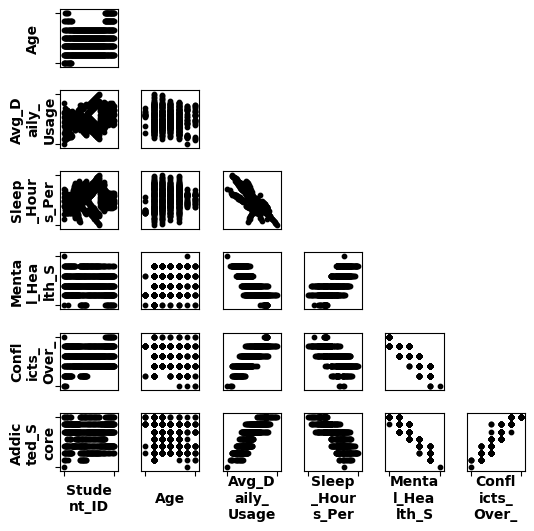

In [8]:
fig, ax = plot_plairplot(df, tick_majorlabel=False, hspace=0.4, wspace=0.4)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




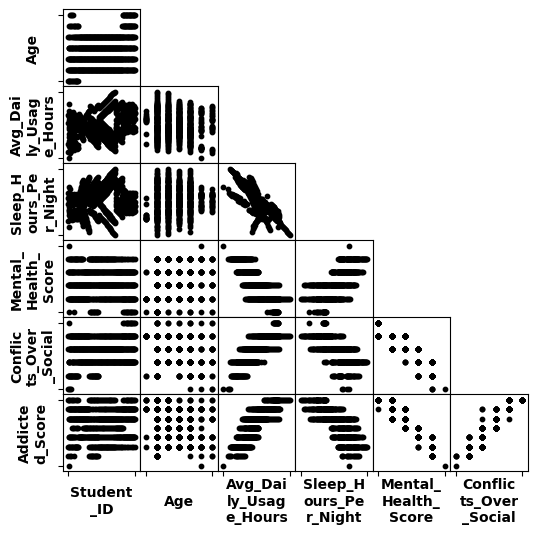

In [9]:
fig, ax = plot_plairplot(df, tick_majorlabel=False, hspace=0, wspace=0)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




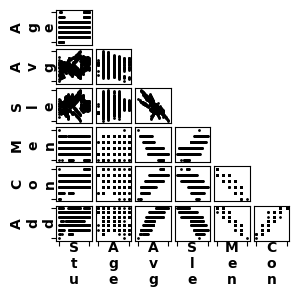

In [10]:
fig, ax = plot_plairplot(df, tick_majorlabel=False, figsize=(3,3), s=1)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




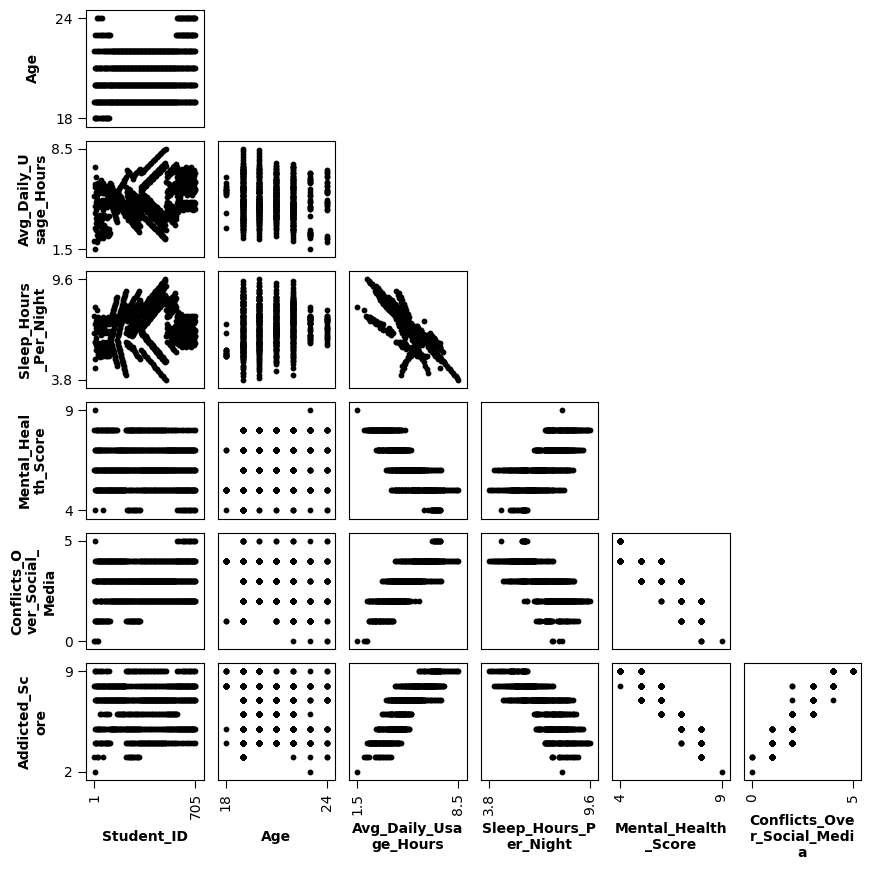

In [11]:
fig, ax = plot_plairplot(df, figsize=(10,10))


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




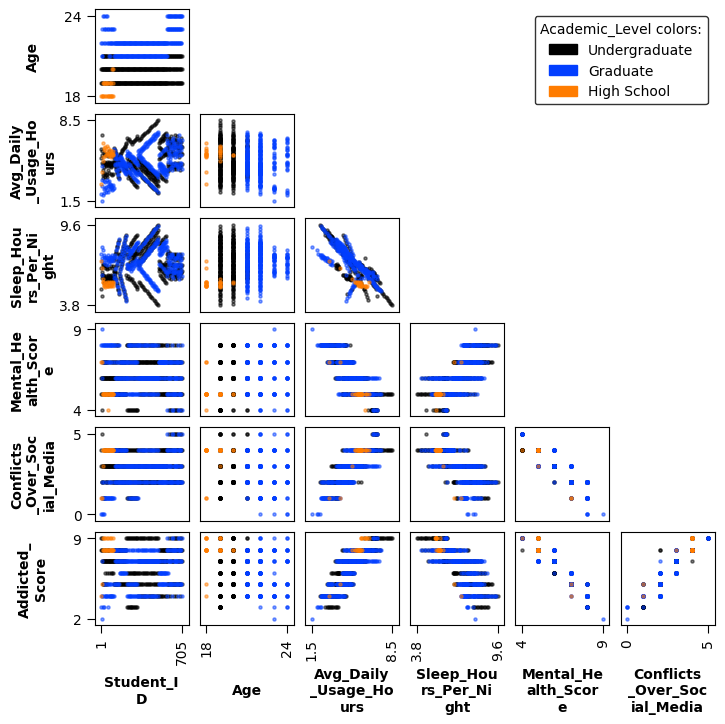

In [12]:
fig, ax = plot_plairplot(df, by='Academic_Level', figsize=(8,8), s=5, alpha=0.5)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




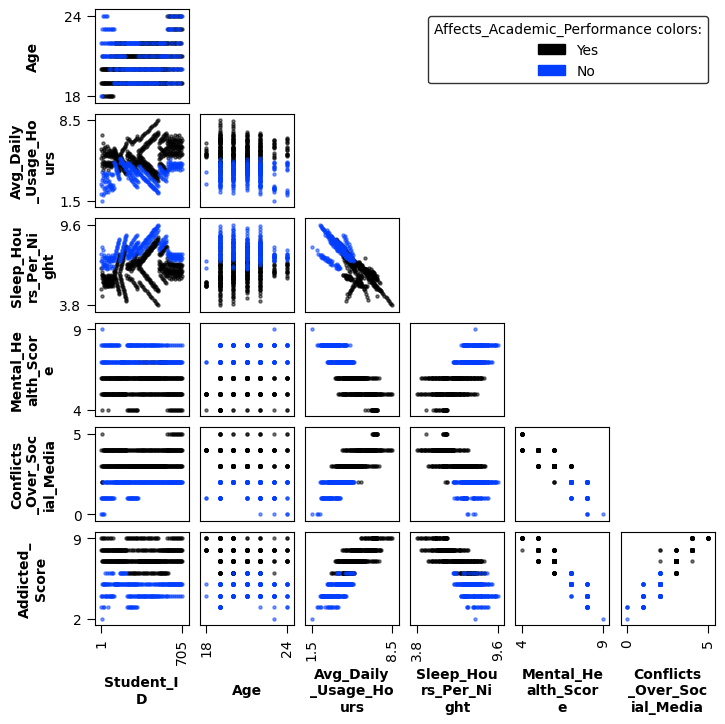

In [13]:
fig, ax = plot_plairplot(df, by='Affects_Academic_Performance', figsize=(8,8), s=5, alpha=0.5)


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




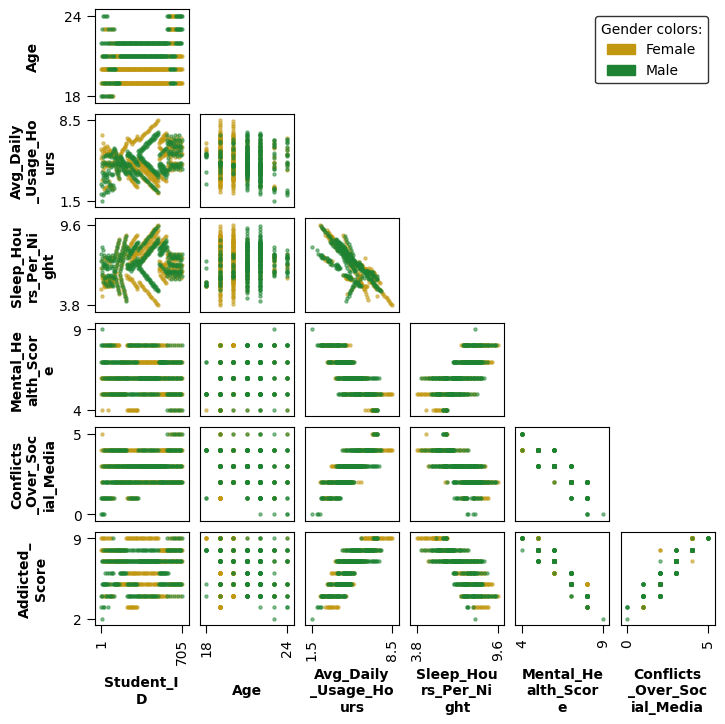

In [14]:
fig, ax = plot_plairplot(df, by='Gender', figsize=(8,8), s=5, alpha=0.5, colors_reference=["#c29810", "#1d8333"])

# Set abbreviations for columns:

In [15]:
abbr_columns = [
    'ID',
    'Age',
    'Gender',
    'AcadLev',
    'Country',
    'DailyUse',
    'Platform',
    'AffecPer',
    'SleepHou',
    'HealthSc',
    'RelStat',
    'Conflict',
    'AddScore',
]
abbr_columns = dict(zip(df.columns, abbr_columns))
df.columns = abbr_columns.values()

## by="Gender"

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




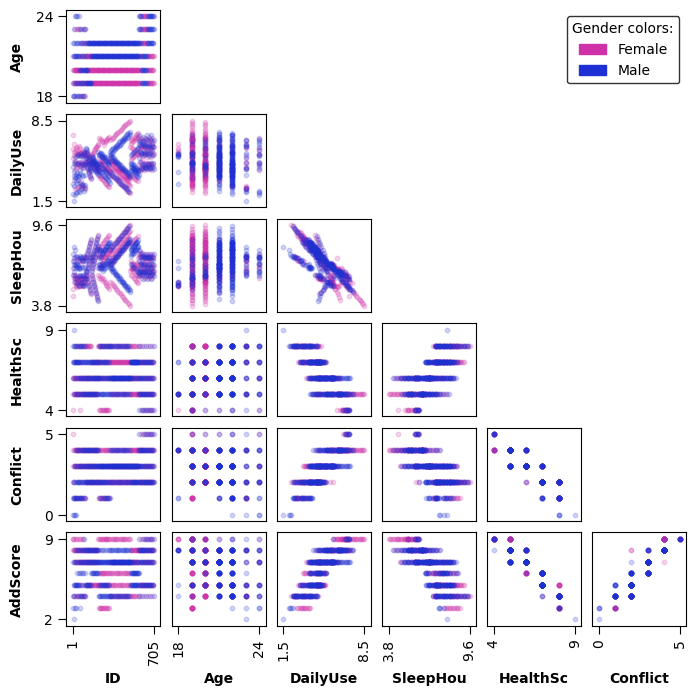

In [17]:
colors = ["#cf32a8", "#1e30d3"]
dict_colors = dict(zip( df['Gender'].unique(), colors ))
fig, ax = plot_plairplot(df, by='Gender', figsize=(8,8), s=10, alpha=0.2, dict_colors_of_variable_by = dict_colors)

## by=Academic Level

In [18]:
df['AcadLev'].unique()

array(['Undergraduate', 'Graduate', 'High School'], dtype=object)


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




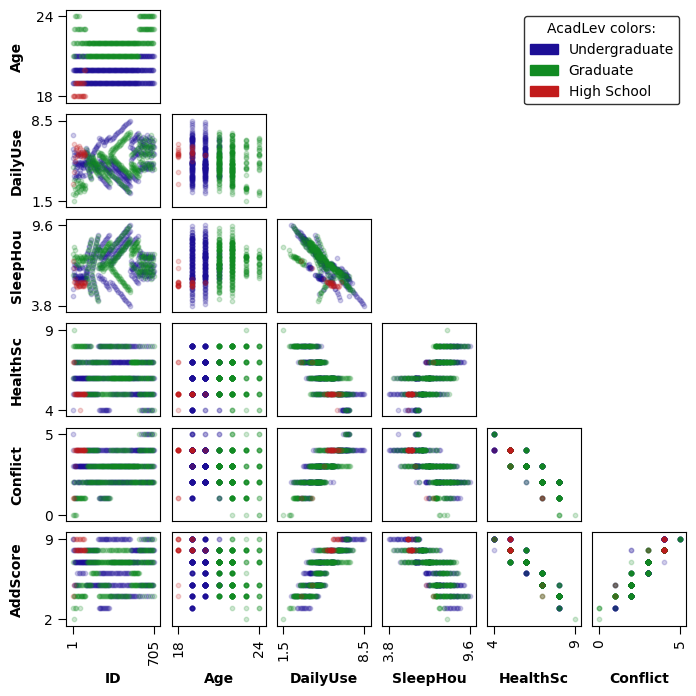

In [19]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))
fig, ax = plot_plairplot(df, by='AcadLev', figsize=(8,8), s=10, alpha=0.2, dict_colors_of_variable_by = dict_colors)

### zorder


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




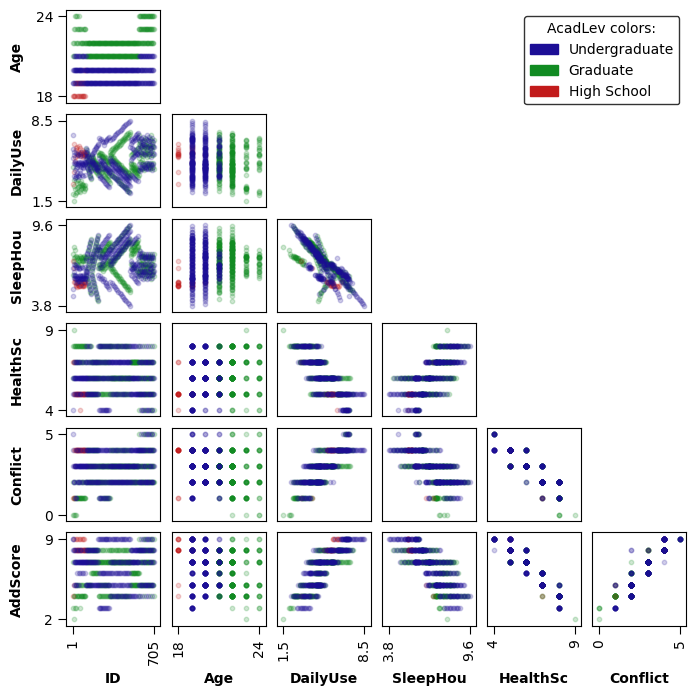

In [20]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))
fig, ax = plot_plairplot(df, by='AcadLev', figsize=(8,8), s=10, alpha=0.2, dict_colors_of_variable_by = dict_colors, zorder=['Undergraduate'])


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




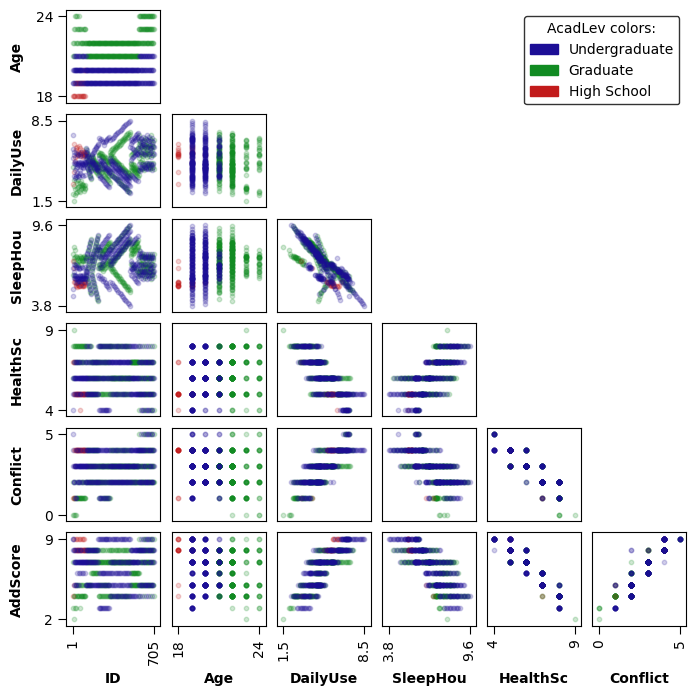

In [21]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))
fig, ax = plot_plairplot(df, by='AcadLev', figsize=(8,8), s=10, alpha=0.2, dict_colors_of_variable_by = dict_colors, zorder=['Undergraduate', 'High School'])

### columns, zorder and markers


    String type columns:

columns =  ['DailyUse', 'SleepHou', 'HealthSc', 'Conflict']




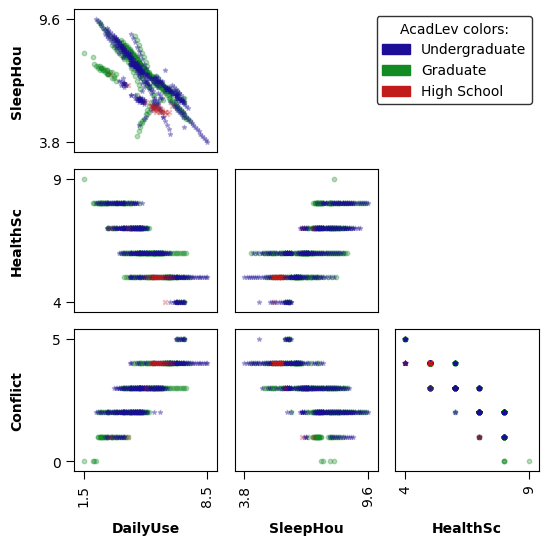

In [22]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev',
                        columns=['DailyUse', 'SleepHou', 'HealthSc', 'Conflict'],
                        alpha=0.3,
                        dict_colors_of_variable_by = dict_colors,
                        zorder=['High School','Undergraduate'],
                        markers = ['x','*']
                        )

# plot with kdeplots


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




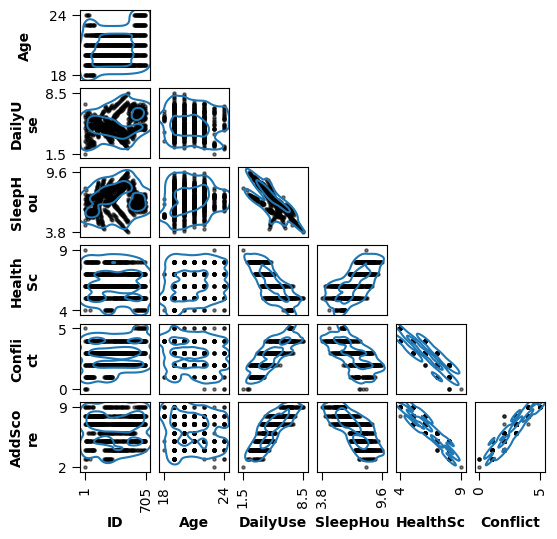

In [23]:
fig, ax = plot_plairplot(df, s=5, alpha=0.5, 
                        show_kdeplots=1
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




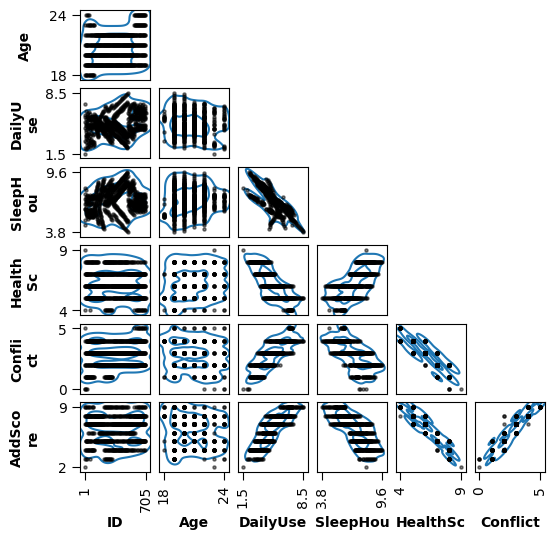

In [24]:
fig, ax = plot_plairplot(df, s=5, alpha=0.5, 
                        show_kdeplots=-1
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




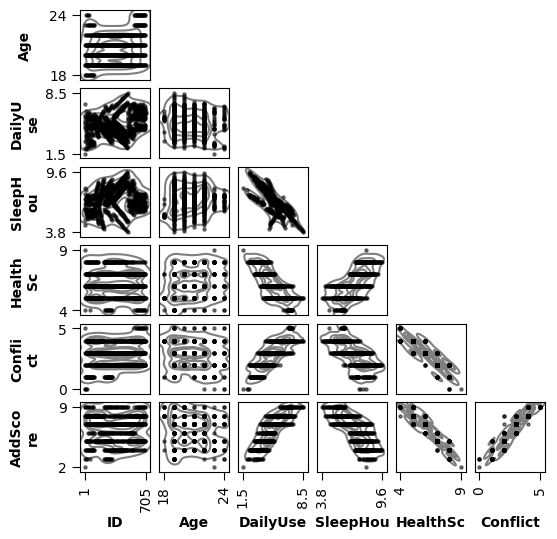

In [25]:
fig, ax = plot_plairplot(df, s=5, alpha=0.5, 
                        show_kdeplots=-1,
                        kdeplots_level = 5,
                        kargs_kdeplots={'color':"#7F7F7F"}
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




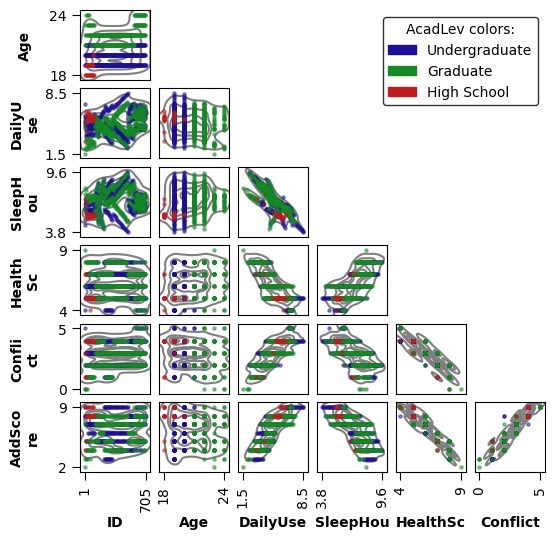

In [26]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev', s=5, alpha=0.5,
                        dict_colors_of_variable_by = dict_colors,
                        #kde args
                        show_kdeplots=-1,
                        kdeplots_level = 5,
                        kargs_kdeplots={'color':"#7F7F7F"}
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




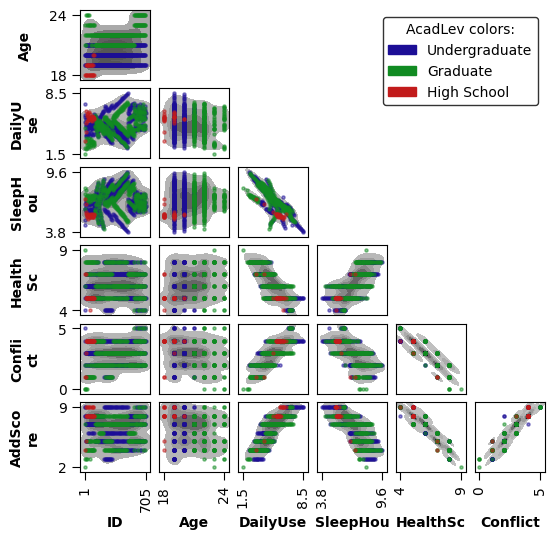

In [27]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev', s=5, alpha=0.5,
                        dict_colors_of_variable_by = dict_colors,
                        #kde args
                        show_kdeplots=-1,
                        kdeplots_level = 5,
                        kargs_kdeplots={'color':"#7F7F7F", 'fill':True}
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




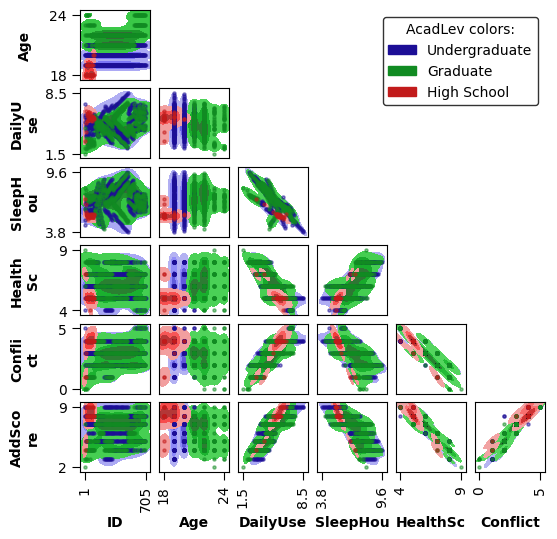

In [28]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev', s=5, alpha=0.5,
                        dict_colors_of_variable_by = dict_colors,
                        #kde args
                        show_kdeplots=-1,
                        kdeplots_level = 4,
                        show_kdeplots_of_by = True,
                        kargs_kdeplots={'fill':True}
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




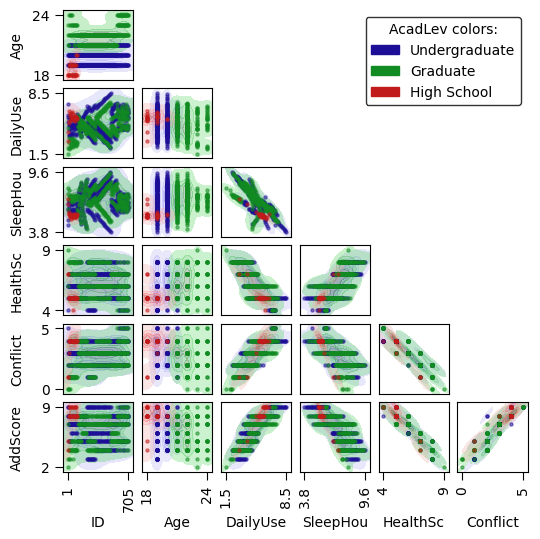

In [29]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev', s=5, alpha=0.5,
                        dict_colors_of_variable_by = dict_colors,
                        kargs_labels={},
                        #kde args
                        show_kdeplots=-1,
                        kdeplots_level = 5,
                        show_kdeplots_of_by = True,
                        kargs_kdeplots={'fill':True,'alpha':.3, 'thresh':0.01}
                        )


    String type columns:

Gender       object
AcadLev       object
Country       object
Platform       object
AffecPer       object
RelStat       object
columns =  ['ID', 'Age', 'DailyUse', 'SleepHou', 'HealthSc', 'Conflict', 'AddScore']




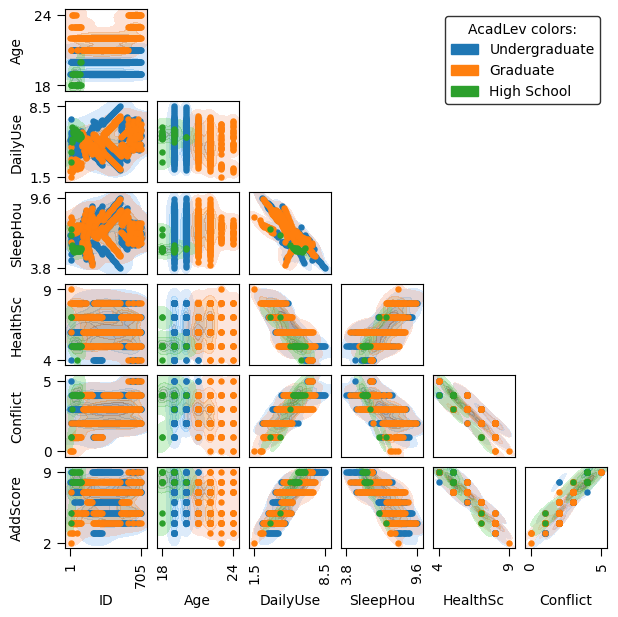

In [30]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
colors = [sns.color_palette("tab10")[0], sns.color_palette("tab10")[1], sns.color_palette("tab10")[2]]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev', s=13, alpha=1,# edgecolors='white', linewidths=.2,
                        dict_colors_of_variable_by = dict_colors,
                        figsize=(7,7),
                        # columns=['DailyUse', 'SleepHou', 'HealthSc'],
                        kargs_labels={},
                        #kde args
                        show_kdeplots=-1,
                        kdeplots_level = 5,
                        show_kdeplots_of_by = True,
                        kargs_kdeplots={'fill':True,'alpha':.3, 'thresh':0.01}
                        )


    String type columns:

columns =  ['DailyUse', 'SleepHou', 'HealthSc', 'Conflict']




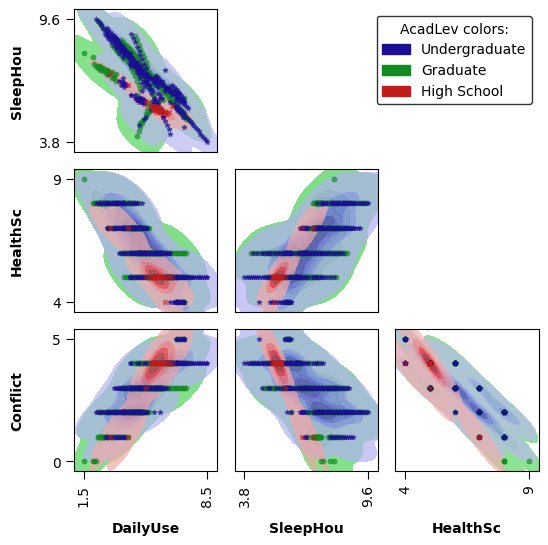

In [31]:
colors = ["#1c0e96", "#118b22", "#c21b1b"]
dict_colors = dict(zip( df['AcadLev'].unique(), colors ))

fig, ax = plot_plairplot(df, by='AcadLev',
                        columns=['DailyUse', 'SleepHou', 'HealthSc', 'Conflict'],
                        alpha=0.6,
                        dict_colors_of_variable_by = dict_colors,
                        zorder=['High School','Undergraduate'],
                        markers = ['x','*'],
                        show_kdeplots=-1,
						show_kdeplots_of_by=True,
                        kdeplots_level= 5,
                        kargs_kdeplots={'fill':True, 'alpha':.7, 'thresh':0.001}
                        )

